Decision Tree Classifier
Best Params: {'clf__max_depth': 7}
Accuracy: 0.9512195121951219
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       100
           1       0.94      0.96      0.95       105

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205


Random Forest Classifier
Best Params: {'rf__max_depth': None, 'rf__n_estimators': 100}
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



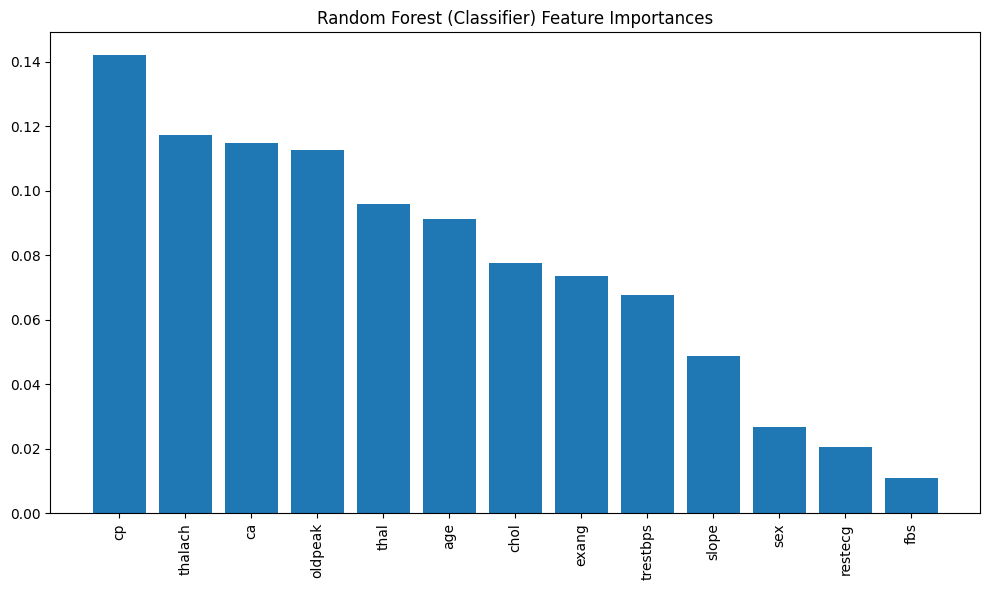

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import graphviz

# Load dataset
df = pd.read_csv("/content/Heart_Disease.csv")
X = df.drop(columns="target")
y = df["target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Decision Tree Classifier
dtc = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", DecisionTreeClassifier(random_state=42))
])
dtc_grid = GridSearchCV(dtc, {"clf__max_depth": [3, 5, 7]}, cv=5)
dtc_grid.fit(X_train, y_train)
print("Decision Tree Classifier")
print("Best Params:", dtc_grid.best_params_)
print("Accuracy:", accuracy_score(y_test, dtc_grid.predict(X_test)))
print(classification_report(y_test, dtc_grid.predict(X_test)))

# Export Decision Tree
tree_model = dtc_grid.best_estimator_.named_steps["clf"]
dot_data = export_graphviz(tree_model, out_file=None, feature_names=X.columns,
                           class_names=["No Disease", "Disease"], filled=True, rounded=True)
graphviz.Source(dot_data).render("dt_class", format="png", cleanup=True)

# Random Forest Classifier
rfc = Pipeline([
    ("scaler", StandardScaler()),
    ("rf", RandomForestClassifier(random_state=42))
])
rfc_grid = GridSearchCV(rfc, {"rf__n_estimators": [50, 100], "rf__max_depth": [5, None]}, cv=5)
rfc_grid.fit(X_train, y_train)
print("\nRandom Forest Classifier")
print("Best Params:", rfc_grid.best_params_)
print("Accuracy:", accuracy_score(y_test, rfc_grid.predict(X_test)))
print(classification_report(y_test, rfc_grid.predict(X_test)))

# Feature Importances
rf_model = rfc_grid.best_estimator_.named_steps["rf"]
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Random Forest (Classifier) Feature Importances")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()